##Лабораторная работа №2 по курсу "Методы машинного обучения"

Гринин Олег группа ИУ5-22М

##Задание

Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать
несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором
данная задача решалась в лекции.

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

устранение пропусков в данных;
кодирование категориальных признаков;
нормализацию числовых признаков.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(15,6))
  # гистограмма
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  ## Q-Q plot
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.show()

In [3]:
!wget  https://raw.githubusercontent.com/azar-s91/dataset/master/BankChurners.csv
data = pd.read_csv('BankChurners.csv', sep=",")
data.head()

--2022-06-08 11:08:13--  https://raw.githubusercontent.com/azar-s91/dataset/master/BankChurners.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1210878 (1.2M) [text/plain]
Saving to: ‘BankChurners.csv’

BankChurners.csv    100%[===================>]   1.15M  --.-KB/s    in 0.05s   

2022-06-08 11:08:13 (21.4 MB/s) - ‘BankChurners.csv’ saved [1210878/1210878]



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Заполнение пустых значений

In [6]:
columnsWithNull = []

data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "Unknown")
nullFixedData = pd.DataFrame(data = imputer.fit_transform(data), columns=data.columns)

Кодирование категориальных признаков

In [9]:
labelEnc = LabelEncoder()
for column in nullFixedData.columns:
  if nullFixedData[column].dtype not in ['float', 'int']:
    nullFixedData[[column]] = pd.DataFrame(labelEnc.fit_transform(nullFixedData[column].astype(str)), columns=[column])
nullFixedData.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7152,1,19,1,3,3,1,2,0,26,...,1,3,518,1757,524,987,90,68,791,58
1,9812,1,23,0,5,2,2,4,0,31,...,1,2,5723,1841,5880,1073,240,59,829,102
2,3053,1,25,1,3,2,1,3,0,23,...,1,0,3718,0,3963,1154,1443,46,818,0
3,7204,1,14,0,4,3,3,4,0,21,...,4,1,3612,1458,6123,1020,110,46,818,757
4,501,1,14,1,3,5,1,2,0,8,...,1,0,4463,0,4698,1145,4705,54,821,0
5,2544,1,18,1,2,2,1,1,0,23,...,1,2,4080,245,3017,1009,53,50,507,308
6,9493,1,25,1,4,6,1,0,1,33,...,1,3,3747,1246,3500,1136,319,57,399,63
7,9818,1,6,1,0,3,3,2,3,14,...,2,2,3135,396,3022,1147,945,62,392,45
8,1401,1,11,1,3,5,2,2,0,23,...,2,0,2206,1458,2054,1156,357,50,710,110
9,5893,1,22,1,2,2,2,3,0,23,...,3,3,332,679,6807,1069,633,58,538,141


Нормализация числовых признаков

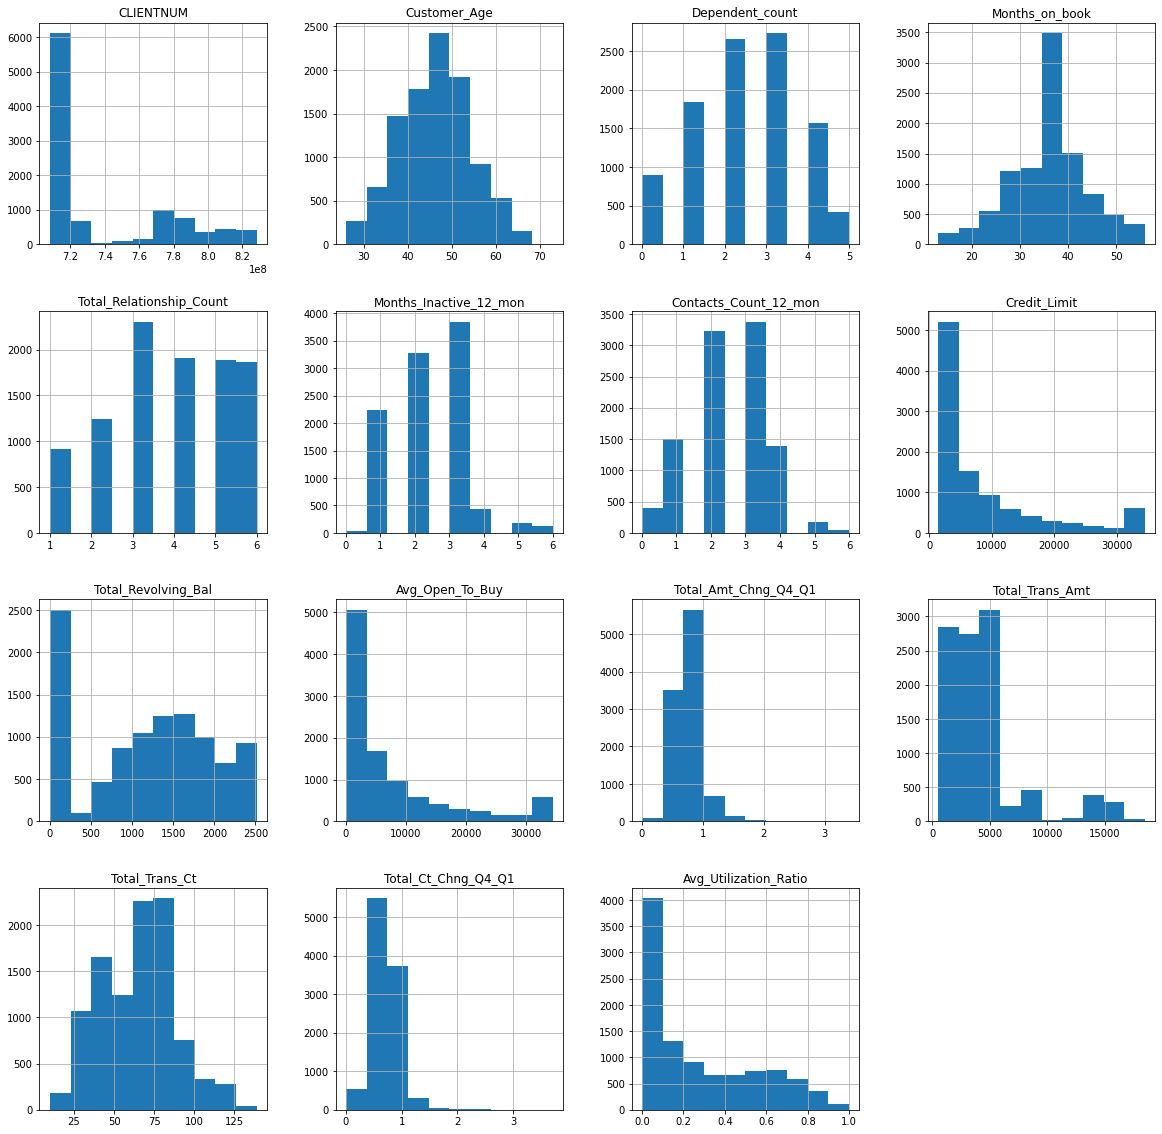

In [10]:
data.hist(figsize=(20,20))
plt.show()

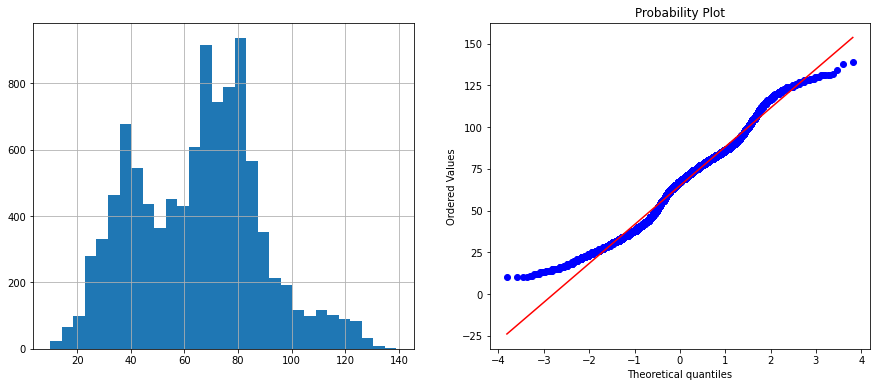

In [11]:
diagnostic_plots(data, 'Total_Trans_Ct')

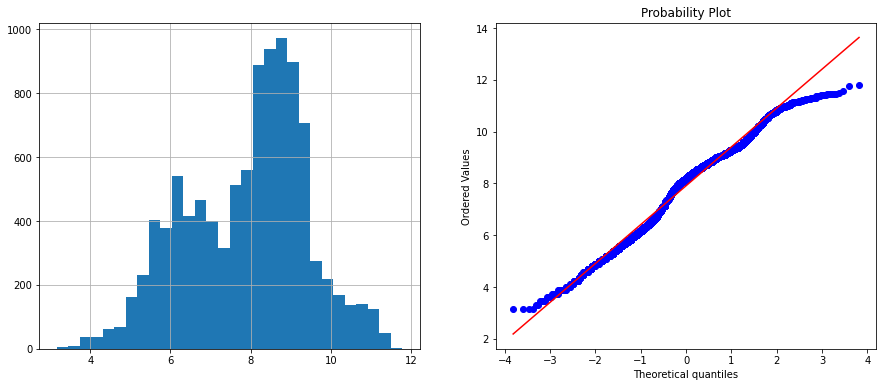

In [12]:
data['Total_Trans_Ct_sqrt'] = data['Total_Trans_Ct']**(1/2)
diagnostic_plots(data, 'Total_Trans_Ct_sqrt')